# **1. Import Library**

In [1]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
import re
import string
from nltk import data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from urllib.request import urlopen
import json
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **2. Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/NLP/PodcastDensuCOC.csv')


## **2.1 Data Cleaning**

### **2.1.1 Remove Duplicate**

In [5]:
# Menemukan data duplikat berdasarkan semua kolom
duplicates_all_columns = df[df.duplicated()]

# Menampilkan jumlah total data duplikat
total_duplicates_all_columns = len(duplicates_all_columns)
print("Total data duplikat (berdasarkan semua kolom):", total_duplicates_all_columns)

Total data duplikat (berdasarkan semua kolom): 3


### **2.1.2 Remove NaN Values**

In [6]:
# remove NaN values
total_nan_values = df.isnull().sum()
print("Total Nan Values:", total_nan_values)

Total Nan Values: publishedAt          0
authorDisplayName    2
textDisplay          0
likeCount            0
dtype: int64


In [7]:
# remove NaN values
df
df

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2024-07-11T14:40:58Z,@Mia-Khoirunnisa,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,0
1,2024-07-11T14:39:54Z,@indryiswary3478,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,0
2,2024-07-11T14:39:45Z,@ahmadhelmy8978,🔥🔥🔥🔥,0
3,2024-07-11T14:39:35Z,@mutiahalendra445,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...",0
4,2024-07-11T14:39:32Z,@nuzulultazkiya627,&quot;Setiap proses pasti selalu ada orang yan...,0
...,...,...,...,...
8874,2024-07-10T14:47:38Z,@jentrimissa3186,❤,0
8875,2024-07-10T14:47:40Z,@itsskin5062,Pertama ❤,0
8876,2024-07-10T14:47:36Z,@dilatoebatulfakikhah7834,❤❤,0
8877,2024-07-10T14:47:35Z,@keirashabira3891,pertama bang,1


# **3. Data Preprocessing**

In [8]:
df_coc = df.copy()
df_coc

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2024-07-11T14:40:58Z,@Mia-Khoirunnisa,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,0
1,2024-07-11T14:39:54Z,@indryiswary3478,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,0
2,2024-07-11T14:39:45Z,@ahmadhelmy8978,🔥🔥🔥🔥,0
3,2024-07-11T14:39:35Z,@mutiahalendra445,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...",0
4,2024-07-11T14:39:32Z,@nuzulultazkiya627,&quot;Setiap proses pasti selalu ada orang yan...,0
...,...,...,...,...
8874,2024-07-10T14:47:38Z,@jentrimissa3186,❤,0
8875,2024-07-10T14:47:40Z,@itsskin5062,Pertama ❤,0
8876,2024-07-10T14:47:36Z,@dilatoebatulfakikhah7834,❤❤,0
8877,2024-07-10T14:47:35Z,@keirashabira3891,pertama bang,1


In [9]:
# Drop kolom yang tidak dibutuhkan
data_coc = df_coc[['publishedAt', 'textDisplay']]
data_coc

,publishedAt,textDisplay
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak..."
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...
...,...,...
8874,2024-07-10T14:47:38Z,❤
8875,2024-07-10T14:47:40Z,Pertama ❤
8876,2024-07-10T14:47:36Z,❤❤
8877,2024-07-10T14:47:35Z,pertama bang


In [10]:
# Convert data type full_text menjadi string
data_coc['textDisplay'] = data_coc['textDisplay'].astype(str)

<ipython-input-10-2efec966596e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coc['textDisplay'] = data_coc['textDisplay'].astype(str)


## **3.1 Case Folding**

In [11]:
def case_folding(text):
  text = text.lower()
  return text

In [13]:
data_coc['case_folding'] = data_coc['textDisplay'].apply(case_folding)
data_coc.head(5)

<ipython-input-13-0ad22ebddbe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coc['case_folding'] = data_coc['textDisplay'].apply(case_folding)


,publishedAt,textDisplay,case_folding
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak..."
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...


## **3.2 Cleaning Text**

In [15]:
# Define function
def cleaningText(text):
    text = re.sub(r'@[_A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[_A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^A-Za-z ]+', ' ', text) #remove all character non alfabet

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

data_coc['cleaning'] = data_coc['case_folding'].apply(cleaningText)
data_coc.head(5)

,publishedAt,textDisplay,case_folding,cleaning
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...


## **3.3 Tokenization**

In [16]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

data_coc['tokenizing'] = data_coc['cleaning'].apply(tokenizingText)
data_coc.head(5)

,publishedAt,textDisplay,case_folding,cleaning,tokenizing
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"[yaa, allah, semoga, anakku, bisa, seperti, me..."
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"[barakallahu, fii, ilmi, anak, cerdas, semoga,..."
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,,[]
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"[suka, bamget, ngulang, quot, durasinya, jam, ..."
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"[quot, setiap, proses, pasti, selalu, ada, ora..."


## **3.4 Convert Slangword**

In [17]:
# slang indonesia
slangwords = pd.read_json('/content/drive/MyDrive/TA/slang_id.json', typ='series')
slangwords = slangwords.to_dict()

# define function convert
def slangWordID(t):
    t = [slangwords.get(w, w) for w in t]
    return t

data_coc['normalisasi_kata'] = data_coc['tokenizing'].apply(slangWordID)
data_coc.head(5)

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, bisa, seperti, me..."
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,..."
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,,[],[]
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ..."
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, setiap, proses, pasti, selalu, ada, ora..."


## **3.5 Remove Stopword**

In [18]:
stopwords = pd.read_csv('/content/drive/MyDrive/TA/stopward.txt',  header=None)
stopwords = set(stopwords[0].tolist())

# define function
def filteringText(t):
  t = [w for w in t if w not in stopwords]
  return t

data_coc['stopward'] = data_coc['normalisasi_kata'].apply(filteringText)
data_coc.head(5)

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata,stopward
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, coc, disukai, ana..."
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,..."
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,,[],[],[]
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ..."
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, proses, ekspektasi, quot]"


In [19]:
# define function token to sentence
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

data_coc['kalimat'] = data_coc['stopward'].apply(toSentence)
data_coc.head(10)

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, coc, disukai, ana...",yaa allah semoga anakku coc disukai anakku ip ...
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...",barakallahu fii ilmi anak cerdas semoga kecerd...
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,,[],[],[],
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...",suka bamget ngulang quot durasinya jam nontonn...
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, proses, ekspektasi, quot]",quot proses ekspektasi quot
5,2024-07-11T14:39:21Z,🔥🔥🔥🔥🔥,🔥🔥🔥🔥🔥,,[],[],[],
6,2024-07-11T14:39:21Z,Enak banget di circle mereka❤,enak banget di circle mereka❤,enak banget di circle mereka,"[enak, banget, di, circle, mereka]","[enak, banget, di, circle, mereka]","[enak, banget, circle]",enak banget circle
7,2024-07-11T14:36:43Z,Tidak bisa mewarisi harta cuman ngewarisin pen...,tidak bisa mewarisi harta cuman ngewarisin pen...,tidak bisa mewarisi harta cuman ngewarisin pen...,"[tidak, bisa, mewarisi, harta, cuman, ngewaris...","[tidak, bisa, mewarisi, harta, cuman, ngewaris...","[mewarisi, harta, cuman, ngewarisin, pendidikan]",mewarisi harta cuman ngewarisin pendidikan
8,2024-07-11T14:35:30Z,"Sandy lu keren bgt, pas kuis bareng bang densu...","sandy lu keren bgt, pas kuis bareng bang densu...",sandy lu keren bgt pas kuis bareng bang densu...,"[sandy, lu, keren, bgt, pas, kuis, bareng, ban...","[sandy, kamu, keren, banget, pas, kuis, bareng...","[sandy, keren, banget, pas, kuis, bareng, bang...",sandy keren banget pas kuis bareng bang densu ...
9,2024-07-11T14:35:28Z,Harus nya mereka ini yg viral anak2 hebat 👍🏾👍🏾,harus nya mereka ini yg viral anak2 hebat 👍🏾👍🏾,harus nya mereka ini yg viral anak hebat,"[harus, nya, mereka, ini, yg, viral, anak, hebat]","[harus, nya, mereka, ini, yang, viral, anak, h...","[nya, viral, anak, hebat]",nya viral anak hebat


## **3.6 Stemming**

In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(t): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    t = stemmer.stem(t)
    return t

data_coc['stemming'] = data_coc['kalimat'].apply(stemmingText)
data_coc.head(5)

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, coc, disukai, ana...",yaa allah semoga anakku coc disukai anakku ip ...,yaa allah moga anak coc suka anak ip gak kalen...
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...",barakallahu fii ilmi anak cerdas semoga kecerd...,barakallahu fii ilmi anak cerdas moga cerdas a...
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,,[],[],[],,
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...",suka bamget ngulang quot durasinya jam nontonn...,suka bamget ngulang quot durasi jam nontonnya jam
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, proses, ekspektasi, quot]",quot proses ekspektasi quot,quot proses ekspektasi quot


In [21]:
# save hasil preprocessing
data_coc.to_csv('coc_preprocessing.csv', index = False, header = True,index_label=None)
data_coc

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, bisa, seperti, me...","[yaa, allah, semoga, anakku, coc, disukai, ana...",yaa allah semoga anakku coc disukai anakku ip ...,yaa allah moga anak coc suka anak ip gak kalen...
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...","[barakallahu, fii, ilmi, anak, cerdas, semoga,...",barakallahu fii ilmi anak cerdas semoga kecerd...,barakallahu fii ilmi anak cerdas moga cerdas a...
2,2024-07-11T14:39:45Z,🔥🔥🔥🔥,🔥🔥🔥🔥,,[],[],[],,
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...","[suka, bamget, ngulang, quot, durasinya, jam, ...",suka bamget ngulang quot durasinya jam nontonn...,suka bamget ngulang quot durasi jam nontonnya jam
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, setiap, proses, pasti, selalu, ada, ora...","[quot, proses, ekspektasi, quot]",quot proses ekspektasi quot,quot proses ekspektasi quot
...,...,...,...,...,...,...,...,...,...
8874,2024-07-10T14:47:38Z,❤,❤,,[],[],[],,
8875,2024-07-10T14:47:40Z,Pertama ❤,pertama ❤,pertama,[pertama],[pertama],[],,
8876,2024-07-10T14:47:36Z,❤❤,❤❤,,[],[],[],,
8877,2024-07-10T14:47:35Z,pertama bang,pertama bang,pertama bang,"[pertama, bang]","[pertama, bang]",[bang],bang,bang


# **4. Pelabelan Data**

## **4.1 Load Lexicon (InSet)**

In [23]:
data_coc = pd.read_csv("/content/coc_preprocessing.csv")

## **4.2 Proses Pelabelan Sentimen**

In [46]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/TA/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/TA/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 1):
        polarity = 'positive'
    elif(score <= -1):
        polarity = 'negative'
    else :
      polarity = 'neutral'
    return score, polarity

In [47]:
# Menghapus baris dengan nilai NaN pada kolom 'stemming'
data_coc = data_coc.dropna(subset=['stemming'])
data_coc

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming,text_preprocessed,polarity_score,polarity
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"['yaa', 'allah', 'semoga', 'anakku', 'bisa', '...","['yaa', 'allah', 'semoga', 'anakku', 'bisa', '...","['yaa', 'allah', 'semoga', 'anakku', 'coc', 'd...",yaa allah semoga anakku coc disukai anakku ip ...,yaa allah moga anak coc suka anak ip gak kalen...,"[yaa, allah, moga, anak, coc, suka, anak, ip, ...",-1,negative
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"['barakallahu', 'fii', 'ilmi', 'anak', 'cerdas...","['barakallahu', 'fii', 'ilmi', 'anak', 'cerdas...","['barakallahu', 'fii', 'ilmi', 'anak', 'cerdas...",barakallahu fii ilmi anak cerdas semoga kecerd...,barakallahu fii ilmi anak cerdas moga cerdas a...,"[barakallahu, fii, ilmi, anak, cerdas, moga, c...",-2,negative
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"['suka', 'bamget', 'ngulang', 'quot', 'durasin...","['suka', 'bamget', 'ngulang', 'quot', 'durasin...","['suka', 'bamget', 'ngulang', 'quot', 'durasin...",suka bamget ngulang quot durasinya jam nontonn...,suka bamget ngulang quot durasi jam nontonnya jam,"[suka, bamget, ngulang, quot, durasi, jam, non...",2,positive
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"['quot', 'setiap', 'proses', 'pasti', 'selalu'...","['quot', 'setiap', 'proses', 'pasti', 'selalu'...","['quot', 'proses', 'ekspektasi', 'quot']",quot proses ekspektasi quot,quot proses ekspektasi quot,"[quot, proses, ekspektasi, quot]",1,positive
6,2024-07-11T14:39:21Z,Enak banget di circle mereka❤,enak banget di circle mereka❤,enak banget di circle mereka,"['enak', 'banget', 'di', 'circle', 'mereka']","['enak', 'banget', 'di', 'circle', 'mereka']","['enak', 'banget', 'circle']",enak banget circle,enak banget circle,"[enak, banget, circle]",2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
8870,2024-07-10T14:47:44Z,Pertam 21 detik,pertam 21 detik,pertam detik,"['pertam', 'detik']","['pertam', 'detik']","['pertam', 'detik']",pertam detik,tam detik,"[tam, detik]",0,negative
8871,2024-07-10T14:47:41Z,AKHIRNYAAAAAA❤❤❤,akhirnyaaaaaa❤❤❤,akhirnyaaaaaa,['akhirnyaaaaaa'],['akhirnyaaaaaa'],['akhirnyaaaaaa'],akhirnyaaaaaa,akhirnyaaaaaa,[akhirnyaaaaaa],0,negative
8872,2024-07-10T14:47:41Z,Nah ini diaaa yg ditunggu&#39;,nah ini diaaa yg ditunggu&#39;,nah ini diaaa yg ditunggu,"['nah', 'ini', 'diaaa', 'yg', 'ditunggu']","['nah', 'ini', 'diaaa', 'yang', 'ditunggu']","['diaaa', 'ditunggu']",diaaa ditunggu,diaaa tunggu,"[diaaa, tunggu]",-1,negative
8873,2024-07-10T14:47:38Z,Hadir gasik,hadir gasik,hadir gasik,"['hadir', 'gasik']","['hadir', 'gasik']","['hadir', 'gasik']",hadir gasik,hadir gasik,"[hadir, gasik]",-1,negative


In [48]:
data_coc['text_preprocessed'] = data_coc['stemming'].apply(tokenizingText)
data_coc['text_preprocessed']

0       [yaa, allah, moga, anak, coc, suka, anak, ip, ...
1       [barakallahu, fii, ilmi, anak, cerdas, moga, c...
3       [suka, bamget, ngulang, quot, durasi, jam, non...
4                        [quot, proses, ekspektasi, quot]
6                                  [enak, banget, circle]
                              ...                        
8870                                         [tam, detik]
8871                                      [akhirnyaaaaaa]
8872                                      [diaaa, tunggu]
8873                                       [hadir, gasik]
8877                                               [bang]
Name: text_preprocessed, Length: 8695, dtype: object

In [49]:
results = data_coc['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_coc['polarity_score'] = results[0]
data_coc['polarity'] = results[1]
print(data_coc['polarity'].value_counts())

polarity
positive    3416
neutral     2725
negative    2554
Name: count, dtype: int64


In [53]:
data_coc.to_csv('hasil_labeling_coc.csv', index = False, header = True,index_label=None)
data_coc.head()

,publishedAt,textDisplay,case_folding,cleaning,tokenizing,normalisasi_kata,stopward,kalimat,stemming,text_preprocessed,polarity_score,polarity
0,2024-07-11T14:40:58Z,Yaa Allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anak2ku bisa seperti mereka 🤲...,yaa allah semoga anakku bisa seperti mereka b...,"['yaa', 'allah', 'semoga', 'anakku', 'bisa', '...","['yaa', 'allah', 'semoga', 'anakku', 'bisa', '...","['yaa', 'allah', 'semoga', 'anakku', 'coc', 'd...",yaa allah semoga anakku coc disukai anakku ip ...,yaa allah moga anak coc suka anak ip gak kalen...,"[yaa, allah, moga, anak, coc, suka, anak, ip, ...",-1,negative
1,2024-07-11T14:39:54Z,Barakallahu fii Ilmi anak² cerdas. Semoga kece...,barakallahu fii ilmi anak² cerdas. semoga kece...,barakallahu fii ilmi anak cerdas semoga kece...,"['barakallahu', 'fii', 'ilmi', 'anak', 'cerdas...","['barakallahu', 'fii', 'ilmi', 'anak', 'cerdas...","['barakallahu', 'fii', 'ilmi', 'anak', 'cerdas...",barakallahu fii ilmi anak cerdas semoga kecerd...,barakallahu fii ilmi anak cerdas moga cerdas a...,"[barakallahu, fii, ilmi, anak, cerdas, moga, c...",-2,negative
3,2024-07-11T14:39:35Z,"Suka bamget ngulang&quot;, durasinya 1 jam, ak...","suka bamget ngulang&quot;, durasinya 1 jam, ak...",suka bamget ngulang quot durasinya jam aku ...,"['suka', 'bamget', 'ngulang', 'quot', 'durasin...","['suka', 'bamget', 'ngulang', 'quot', 'durasin...","['suka', 'bamget', 'ngulang', 'quot', 'durasin...",suka bamget ngulang quot durasinya jam nontonn...,suka bamget ngulang quot durasi jam nontonnya jam,"[suka, bamget, ngulang, quot, durasi, jam, non...",2,positive
4,2024-07-11T14:39:32Z,&quot;Setiap proses pasti selalu ada orang yan...,&quot;setiap proses pasti selalu ada orang yan...,quot setiap proses pasti selalu ada orang yang...,"['quot', 'setiap', 'proses', 'pasti', 'selalu'...","['quot', 'setiap', 'proses', 'pasti', 'selalu'...","['quot', 'proses', 'ekspektasi', 'quot']",quot proses ekspektasi quot,quot proses ekspektasi quot,"[quot, proses, ekspektasi, quot]",1,positive
6,2024-07-11T14:39:21Z,Enak banget di circle mereka❤,enak banget di circle mereka❤,enak banget di circle mereka,"['enak', 'banget', 'di', 'circle', 'mereka']","['enak', 'banget', 'di', 'circle', 'mereka']","['enak', 'banget', 'circle']",enak banget circle,enak banget circle,"[enak, banget, circle]",2,positive


In [54]:
data_coc  = pd.read_csv("/content/hasil_labeling_coc.csv")

## **4.3 Sentimen Polarity**

In [56]:
#memanggil jumlah item (anggota) dari sebuah objek positive dan negative
tweet_positif=data_coc[data_coc['polarity'] == 'positive']
tweet_negative=data_coc[data_coc['polarity'] == 'negative']
tweet_netral=data_coc[data_coc['polarity'] == 'neutral']
total_tweets=len(tweet_positif)+len(tweet_negative)+len(tweet_netral)
print(len(tweet_positif), "({}%)".format(100*len(tweet_positif)/total_tweets))
print(len(tweet_negative), "({}%)".format(100*len(tweet_negative)/total_tweets))
print(len(tweet_netral), "({}%)".format(100*len(tweet_netral)/total_tweets))

3416 (39.286946520989076%)
2554 (29.373202990224268%)
2725 (31.33985048878666%)


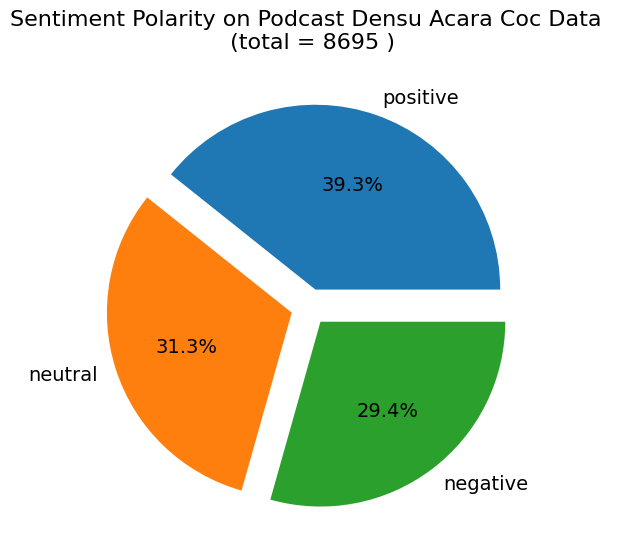

In [60]:
# Menghitung jumlah kemunculan masing-masing kategori
polarity_counts = pd.Series(data_coc['polarity']).value_counts()

# Pastikan terdapat tiga kategori yang akan ditampilkan
sizes = [count for count in polarity_counts]
labels = list(polarity_counts.index)

# Memastikan ada tiga elemen untuk explode
explode = (0.1, 0.1, 0.1)  # Sesuaikan jumlah elemen jika perlu

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title(f'Sentiment Polarity on Podcast Densu Acara Coc Data \n (total = {len(data_coc["polarity"])} )', fontsize=16, pad=20)
plt.show()

### 4.3.1 Sentiment Positive

In [61]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = data_coc[data_coc['polarity'] == 'positive']
positive_tweets = positive_tweets[['stemming', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,stemming,polarity_score,polarity
1,baca amp renung renung pagi siang amp malam dalam efesus a href kuat tuhan kuat kuasa nya kena lengkap senjata allah tahan lawan tipu muslihat iblis juang lawan darah daging lawan perintah perintah lawan kuasa kuasa lawan penghulu penghulu dunia gelap lawan roh roh jahat udara kuat teguh dalam tuhan gentar takut kena lengkap senjata allah musuh musuh kuasa kuasa roh gelap mantra mantra anak anak tuhan nama tuhan allah semesta alam tuhan allah yesus kristus sang juru selamat umat manusia hal daud kalah goliat manusia raksasa filistin daud datang nama tuhan semesta alam allah israel samuel a href daud kalah lawan goliat filistin bangsa israel hamba filistin palestina janji perang bangsa israel filistin palestina tepat taat allah mengijinkan bangsa israel bangsa umat pilih allah daud pilih allah daud kalah goliat filistin palestina hamba bangsa israel samuel filistin palestina milik hak diri negara atas tanah janji hamba bangsa israel tunduk janji perang catat dalam yohanes quot sesat muncul pergi dunia aku yesus kristus manusia si sesat antikristus quot waspada ajar nabi nabi palsu guru guru palsu aku tuhan sang cipta turun dunia rupa manusia antara firman nya tuhan allah yesus kristus sipenyesat antikristus barang sangkal bapa anak sipenyesat antikristus dajjal tulis dalam yohanes makna dajjal bawa fitnah manusia bohong sembunyi benar palsu simpul dajjal manusia bohong tiada kitab kitab alkitab ganti kitab palsu waspada saudara dalam galatia quot heran lekas balik kasih karunia kristus panggil ikut injil injil acau memutarbalikkan injil kristus malaikat surga berita injil beda injil berita kepada kutuk quot waspada manusia ajar kitab asal mahluk goib dalam gelap mahluk goib malaikat buat dosa setan dalam petrus allah sayang malaikat malaikat buat dosa lempar neraka serah gelap simpan hakim allah sang cipta simpan malaikat malaikat buat dosa setan setan dalam gelap hakim manusia aku wahyu dalam gelap wahyu malaikat dosa wahyu setan isi wahyu setan tentang tolak isi kitab kitab wahyu setan tentang tolak isi alkitab asal allah sang cipta tuhan sembah manusia bawa wahyu gelap beda tuhan sembah nabi nabi israel dalam kitab kitab alkitab nabi muhammad wahyu terima mahluk goib jibril dalam hira sembah tuhan negeri mek an naml nabi nabi israel dalam kitab kitab alkitab sembah allah israel ulang a href allah allah luar bangsa israel berhala tawarikh a href nabi nabi israel sembah allah israel sembah tuhan negeri mek nabi muhammad sembah tuhan negeri mek sembah allah israel sembah nabi nabi bangsa israel umat yahudi umat kristen aku nabi muhammad muhammad manusia buta huruf tolak allah israel sembah nabi israel tolak kitab kitab alkitab tulis nabi rasul benar menghujad agama benar benar firman tuhan tulis dalam alkitab benar sesat rupa rupa ajar sesat satu jalan benar tuhan allah yesus kristus sang juru selamat umat manusia turun dunia rupa manusia yohanes silah tentu pilih pilih paksa tahu agama dunia ajar baik agama dunia umat manusia dalam selamat ke...,301,positive
2,ok aku pintar manusia cipta tuhan bodoh unggul quot inti lengkap pintar bidang pintar bidang pintar bidang teori arsitek si arsitek rumah butuh bangun rumah inti lengkap deh unggul bidang quot bayang tuhan pintar bidang butuh kuasa bidang simpul quot inti bersukur tuhan tekun unggul mu nenyerah quot bidang syukur usaha doa insyaallah allah membukakkan jalan suksese mu tuhan cipta manusia sempurna,38,positive
3,keren bgtbgtbgt iya allah so proud of them xaviera bicara bawa sudut pandang masyaallah shakira allah nerapin positif hiduppnya sandy omg slalu bangga attitude nilai plus motivasi hebat suka banget sudut pandang terimakasih yaaa inspirasi,34,positive
4,banget ilmu amal jariyah loh nimba ilmu amal bentuk ajar ilmu ciptain alat manfaat ahli selamat dokter pokok waris ilmu gak rugi,33,positive
5,mama papa kaya tk spend money asah bakat alhamdulillah mama papa full support always bilang kaya usaha baik didik sukses kaya cari dg ilmu 

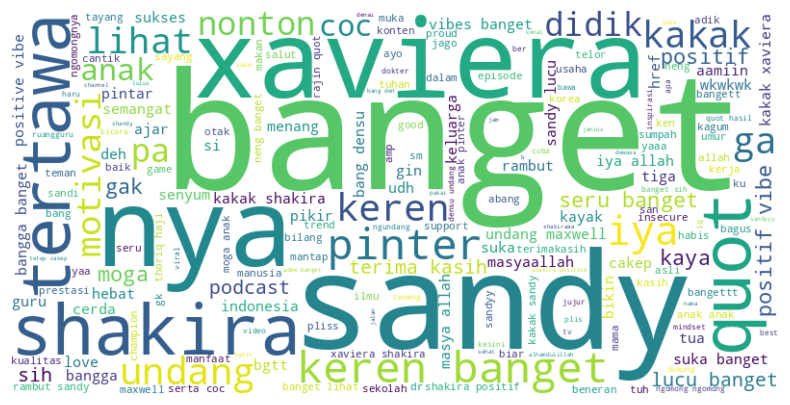

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks positif menjadi satu teks
all_positive_text = ' '.join(positive_tweets['stemming'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.3.2 Sentiment Negative

In [64]:
pd.set_option('display.max_colwidth', 3000)
negative = data_coc[data_coc['polarity'] == 'negative']
negative = negative[['stemming', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
negative.index += 1
negative[400:500]

,stemming,polarity_score,polarity
401,geli banget thariq haji sandy muka wei,-1,negative
402,vibesnya anak pinter beda iya,-1,negative
403,viral kayak gin umur haji gak haji gak,-1,negative
404,liat banget drsemuanya pen dominan ga kalah bicara,-1,negative
405,youtube aplikasi guru,-1,negative
...,...,...,...
496,densu nonton coc biar enaak nyambung ngobrolnya,-2,negative
497,keren bangett,-2,negative
498,wajib viralkan viralkan tv,-2,negative
499,ramai plis,-2,negative


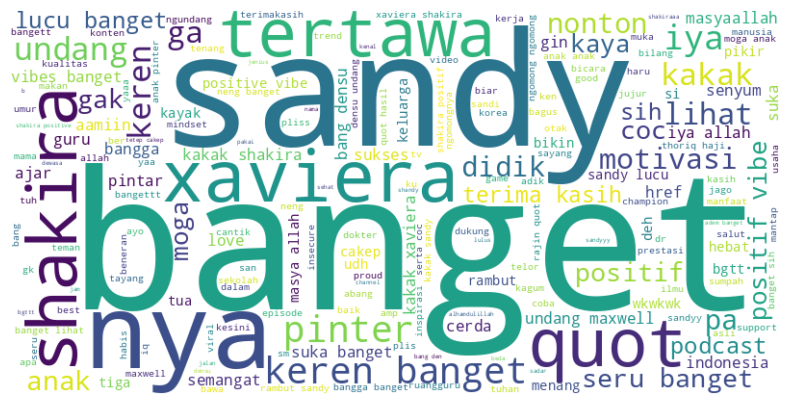

In [65]:
# Menggabungkan semua teks positif menjadi satu teks
all_negative_text = ' '.join(negative['stemming'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.3.3 Sentiment Neutral

In [66]:
pd.set_option('display.max_colwidth', 3000)
neutral_tweets = data_coc[data_coc['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['stemming', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
neutral_tweets.index += 1
neutral_tweets[0:20]

,stemming,polarity_score,polarity
1,postifff poll,0,neutral
2,keren,0,neutral
3,omggggg,0,neutral
4,seruuuuu,0,neutral
5,xaviera kerennnn,0,neutral
6,sayang ga maxwel,0,neutral
7,kang densu host derybok,0,neutral
8,shakira nyala bgtttt kereennn,0,neutral
9,ga ekspek ihh thoriq haji tertawa,0,neutral
10,kakak xaviera,0,neutral


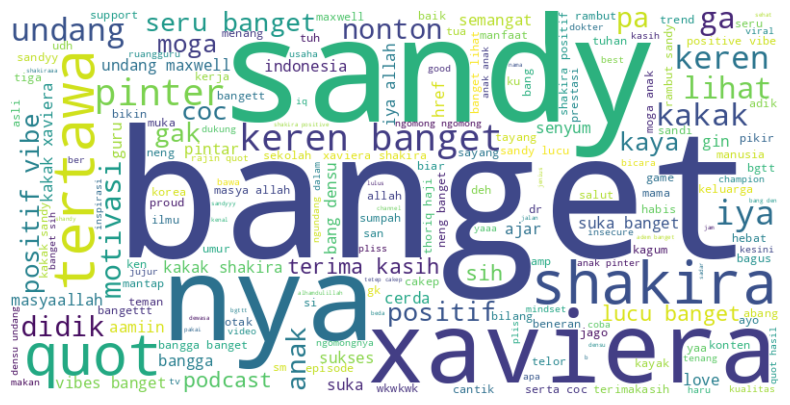

In [67]:
##Menggabungkan semua teks positif menjadi satu teks
all_neutral_text = ' '.join(neutral_tweets['stemming'])

# # Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

# # Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **5. Pembobotan Kata (TF-IDF, ngram=(1,1))**

TF IDF

In [69]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(data_coc['stemming'])

TfidfVectorizer()

In [70]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

7775


In [71]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aa' 'aaa' 'aaaa' ... 'zuckerberg' 'zx' 'zz']


In [73]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(data_coc['stemming']).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaaa,...,zomm,zona,zonasi,zone,zoom,zoomnya,zubrek,zuckerberg,zx,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(data_coc['polarity'])

# Only TF-IDF ✅

#**Balancing Data** **SMOTE**

In [76]:

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [79]:

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print("Length of new dataset = ", len(X_resampled))
print("Proportion on time =", np.count_nonzero(y_resampled == 1) / len(y_resampled) * 100, "%")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
X_train_RS, X_test_RS, y_train_RS, y_test_RS = train_test_split(X_resampled, y_resampled, test_size=.2, random_state=0)

Length of new dataset =  10248
Proportion on time = 0.0 %


# **6. Modeling**

In [78]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

## **7.1 Split Data Train dan Test**

In [80]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train_RS, X_test_RS, y_train_RS, y_test_RS = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=15)

## **7.2 Train Data**

In [81]:
# Training the model
mnb = MultinomialNB()               # Load algoritma pembelajaran
rf = RandomForestClassifier()
lr = LogisticRegression()
svm = svm.SVC()
model_mnb = mnb.fit(X_train_RS, y_train_RS)   # Fitkan (latih) algoritma pada data latih & label latih
model_rf = rf.fit(X_train, y_train)
model_lr = lr.fit(X_train_RS, y_train_RS)
model_svm = svm.fit(X_train_RS, y_train_RS)

# Simpan model hasil traning
dump(model_mnb, filename='model_mnb.joblib')
dump(model_rf, filename='model_rf.joblib')
dump(model_lr, filename='model_lr.joblib')
dump(model_svm, filename='model_svm.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['model_svm.joblib']

## **7.3 Predict Data**

In [82]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred_mnb = model_mnb.predict(X_test_RS)
model_pred_rf = model_rf.predict(X_test_RS)
model_pred_lr = model_lr.predict(X_test_RS)
model_pred_svm = model_svm.predict(X_test_RS)

## **7.4 Evaluation**

In [88]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_rf = (model_pred_rf == y_test_RS).sum()
prediksi_salah_rf = (model_pred_rf != y_test_RS).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_rf)
print('Jumlah prediksi salah\t:', prediksi_salah_rf)

accuracy_rf = prediksi_benar_rf / (prediksi_benar_rf + prediksi_salah_rf)*100
print('Akurasi pengujian\t:', accuracy_rf, '%')

Jumlah prediksi benar	: 2902
Jumlah prediksi salah	: 173
Akurasi pengujian	: 94.3739837398374 %


In [89]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test_RS, model_pred_rf))

Classification report:
               precision    recall  f1-score   support

    negative       0.97      0.90      0.94      1065
     neutral       0.93      0.98      0.95      1008
    positive       0.93      0.96      0.94      1002

    accuracy                           0.94      3075
   macro avg       0.94      0.94      0.94      3075
weighted avg       0.94      0.94      0.94      3075



In [90]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm = confusion_matrix(y_test_RS,model_pred_rf)
cm_rf = pd.DataFrame(cm,index = ['Negative','Positive', 'Neutral'], columns = ['Negative','Positive', 'Neutral'])

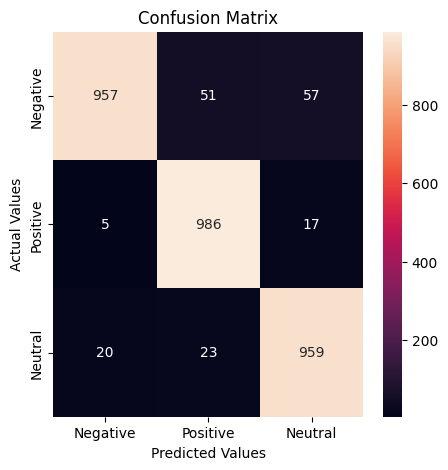

In [91]:
import seaborn as sns

#Memanggil Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [97]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm = (model_pred_svm == y_test_RS).sum()
prediksi_salah_svm = (model_pred_svm != y_test_RS).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm)
print('Jumlah prediksi salah\t:', prediksi_salah_svm)

accuracy_svm = prediksi_benar_svm / (prediksi_benar_svm + prediksi_salah_svm)*100
print('Akurasi pengujian\t:', accuracy_svm, '%')

Jumlah prediksi benar	: 2648
Jumlah prediksi salah	: 427
Akurasi pengujian	: 86.11382113821138 %


In [98]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test_RS, model_pred_svm))

Classification report:
               precision    recall  f1-score   support

    negative       0.89      0.84      0.86      1065
     neutral       0.81      0.92      0.86      1008
    positive       0.89      0.83      0.86      1002

    accuracy                           0.86      3075
   macro avg       0.86      0.86      0.86      3075
weighted avg       0.86      0.86      0.86      3075



In [99]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm = confusion_matrix(y_test_RS,model_pred_svm)
cm_svm = pd.DataFrame(cm,index = ['Negative','Positive', 'Neutral'], columns = ['Negative','Positive', 'Neutral'])

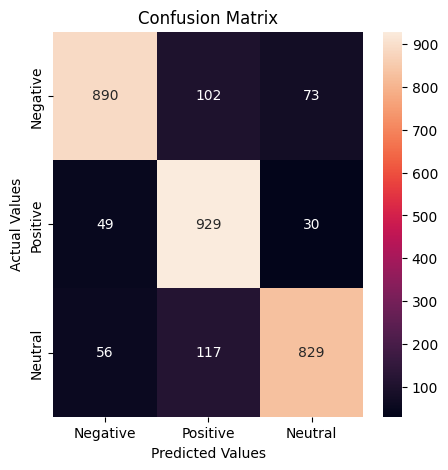

In [100]:
import seaborn as sns

#Memanggil Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm_svm, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

----